<a href="https://colab.research.google.com/github/nanda1296/Tourism-Dataset-Analysis-using-Deep-Learning/blob/main/DP_Mid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2023W-T3 AISC2007 - Deep Learning 01

Midterm

Student Name: Nanda Kishore Karicherla

StudentID: 500197946

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel('Tourism.xlsx', 'Tourism')
df.head()


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [ ]:
df.drop('CustomerID',axis='columns',inplace=True)

In [ ]:
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]

In [ ]:
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(df[i].value_counts())
    print('_'*40)

Unique values in Designation are :
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
________________________________________
Unique values in ProdTaken are :
0    3968
1     920
Name: ProdTaken, dtype: int64
________________________________________
Unique values in OwnCar are :
1    3032
0    1856
Name: OwnCar, dtype: int64
________________________________________
Unique values in Passport are :
0    3466
1    1422
Name: Passport, dtype: int64
________________________________________
Unique values in CityTier are :
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
________________________________________
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
________________________________________
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         

In [ ]:
df.Gender.value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [ ]:
df['Gender'] = df['Gender'].apply(lambda z: 'Female' if z == 'Fe Male' else z)
df.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [ ]:
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]
df[cat_cols] = df[cat_cols].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [ ]:
df.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


In [ ]:
df['Agebin'] = pd.cut(df['Age'], bins = [18,25, 31, 40, 50, 65], labels = ['18-25','26-30', '31-40', '41-50', '51-65'])
df.Agebin.value_counts()

31-40    1722
41-50    1073
26-30     971
51-65     549
18-25     333
Name: Agebin, dtype: int64

In [ ]:
df['Incomebin'] = pd.cut(df['MonthlyIncome'], bins = [0,20000, 30000,40000,50000,100000], labels = ['<20000', '<30000', '<40000', '<50000','<100000'])
df.Incomebin.value_counts()

<30000     3025
<20000     1040
<40000      588
<100000       2
<50000        0
Name: Incomebin, dtype: int64

Missing Value Detection and Correction

In [ ]:
df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Agebin                      240
Incomebin                   233
dtype: int64

In [ ]:
df['TypeofContact'].mode()
df['TypeofContact']=df['TypeofContact'].fillna('Self Enquiry')
df['TypeofContact'].isnull().sum()

0

In [ ]:
df.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].median()
df['NumberOfFollowups']=df.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))
df['PreferredPropertyStar']=df.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))
df[df["PreferredPropertyStar"].isnull()]

df.groupby(['ProductPitched','NumberOfFollowups'], as_index=False)["DurationOfPitch"].median()
df["DurationOfPitch"] = df.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(lambda x: x.fillna(x.median()))
df[df["DurationOfPitch"].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Agebin,Incomebin


In [ ]:
df.groupby(['MaritalStatus'])["NumberOfTrips"].median()
df["NumberOfTrips"] = df.groupby(["MaritalStatus"])["NumberOfTrips"].apply(lambda x: x.fillna(x.median()))

df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(0)

df.groupby(["Designation", "Gender","MaritalStatus"])["Age"].median()
df["Age"] = df.groupby(["Designation", "Gender","MaritalStatus"])["Age"].apply(lambda x: x.fillna(x.median()))

df.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].median()
df["MonthlyIncome"]=df.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(lambda x: x.fillna(x.median()))

In [ ]:
df['Agebin'] = pd.cut(df['Age'], bins = [15,25, 31, 40, 50, 70], labels = ['15-25','26-30', '31-40', '41-50', '51-70'])

df['Incomebin'] = pd.cut(df['MonthlyIncome'], bins = [0,20000,30000,40000,50000,100000], labels = ['<20000', '<30000','<40000','<50000','<100000'])


In [ ]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Agebin                      0
Incomebin                   0
dtype: int64

**Customer Profile**

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

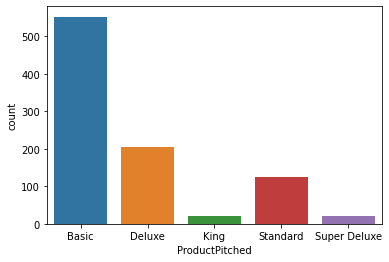

In [ ]:
cust_prof=df[df['ProdTaken']==1]
sns.countplot(x="ProductPitched", data=cust_prof)

Text(0.5, 1.0, 'Agebin Product wise')

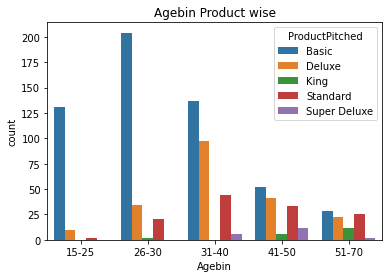

In [ ]:
sns.countplot(x='Agebin',hue='ProductPitched',data=cust_prof).set_title('Agebin Product wise')

Text(0.5, 1.0, 'Incomebin Product Pitched')

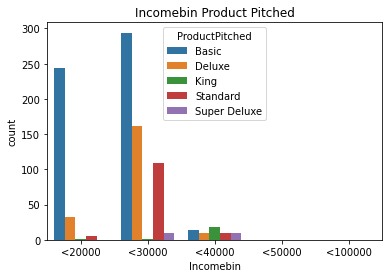

In [ ]:
sns.countplot(x='Incomebin',hue='ProductPitched',data=cust_prof).set_title('Incomebin Product Pitched')

Text(0.5, 1.0, 'Age vs Product Pitched')

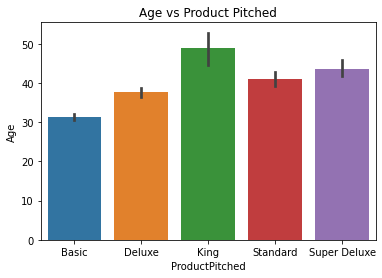

In [ ]:
sns.barplot(y='Age',x='ProductPitched',data=cust_prof).set_title('Age vs Product Pitched')

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

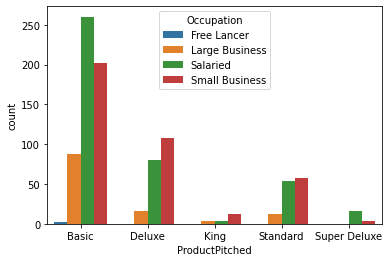

In [ ]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="Occupation")

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

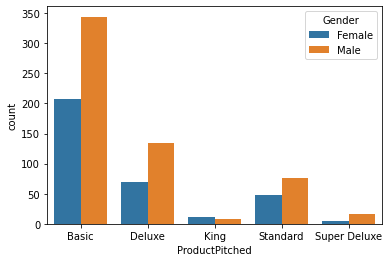

In [ ]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="Gender")

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

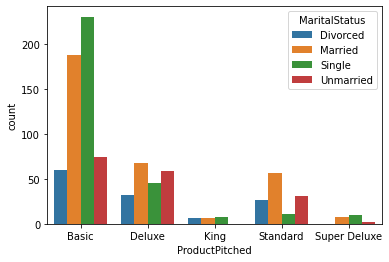

In [ ]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="MaritalStatus")

Text(0.5, 1.0, 'Monthly Income vs Product Pitched')

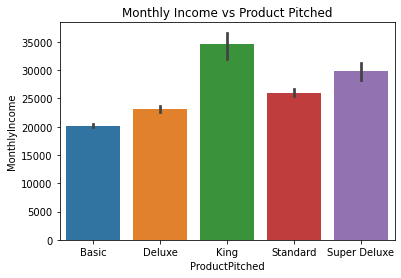

In [ ]:
sns.barplot(y='MonthlyIncome',x='ProductPitched',data=cust_prof).set_title('Monthly Income vs Product Pitched')

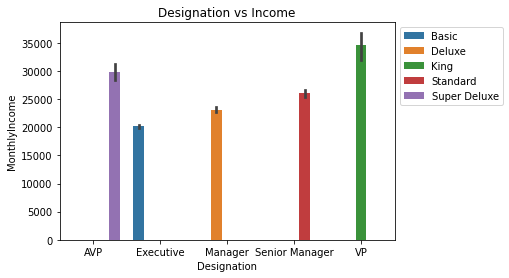

In [ ]:
sns.barplot(x='Designation',y='MonthlyIncome',data=cust_prof,hue='ProductPitched').set_title('Designation vs Income')
plt.legend(bbox_to_anchor=(1, 1))

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

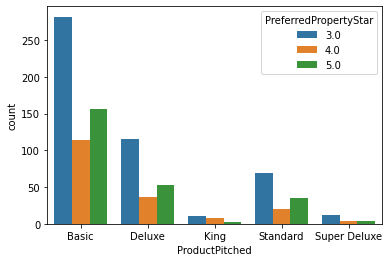

In [ ]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="PreferredPropertyStar")

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

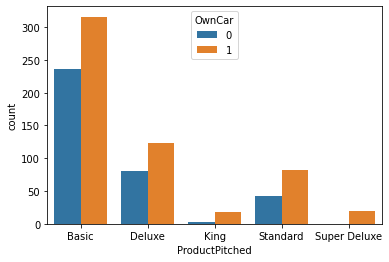

In [ ]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="OwnCar")

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

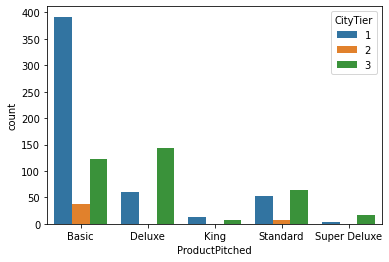

In [ ]:
sns.countplot(x="ProductPitched", data=cust_prof,  hue="CityTier")

In [ ]:
cust_prof.groupby(['ProductPitched']).agg({'MonthlyIncome':{'mean','min','max'},'Age':{'mean','min','max'}})

MonthlyIncome                          Age                 
                         max          mean      min   max       mean   min
ProductPitched                                                            
Basic                37868.0  20179.108696  16009.0  59.0  31.264493  18.0
Deluxe               38525.0  23093.333333  17086.0  59.0  37.590686  21.0
King                 38537.0  34672.100000  17517.0  59.0  48.900000  27.0
Standard             38395.0  26035.419355  17372.0  60.0  40.991935  19.0
Super Deluxe         37502.0  29823.800000  21151.0  56.0  43.500000  39.0

In [ ]:
def stacked_plot(x):
    sns.set_palette(sns.color_palette("nipy_spectral", 8))
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)
    print(tab1)
    print('_'*120)
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Product Taken",bbox_to_anchor=(1,1))

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
________________________________________________________________________________________________________________________
ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
________________________________________________________________________________________________________________________
ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
________________________________________________________________________________________________________________________
ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male 

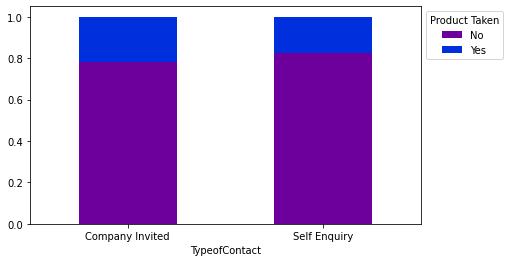

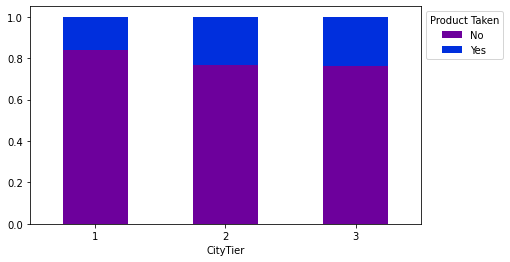

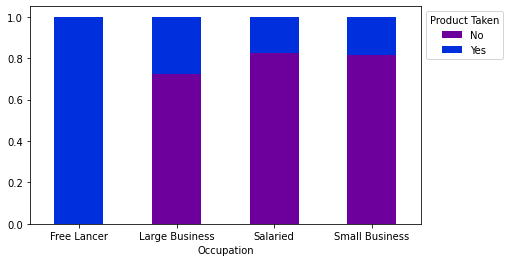

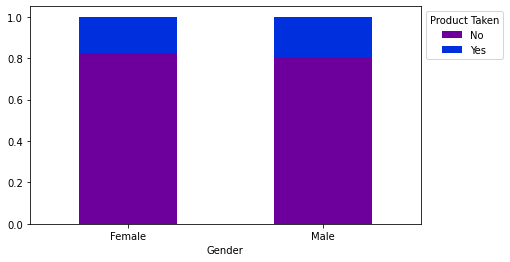

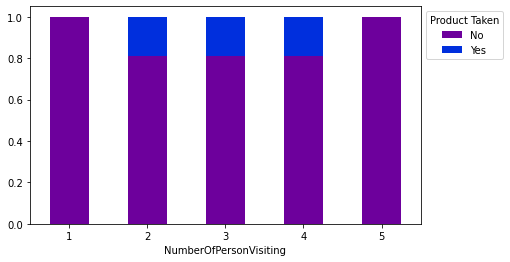

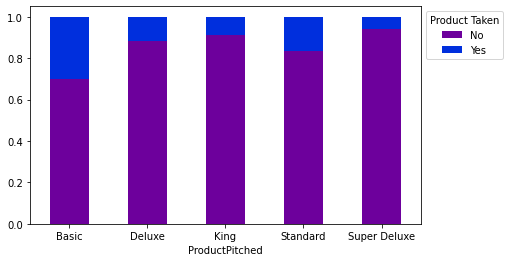

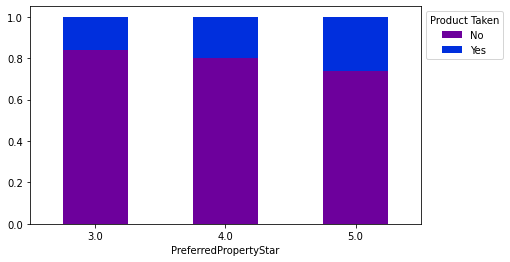

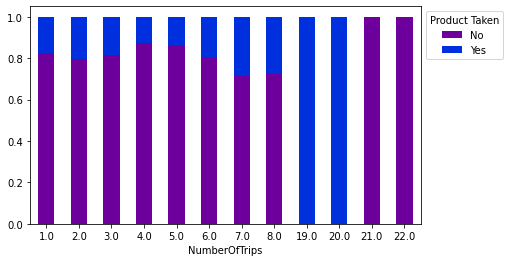

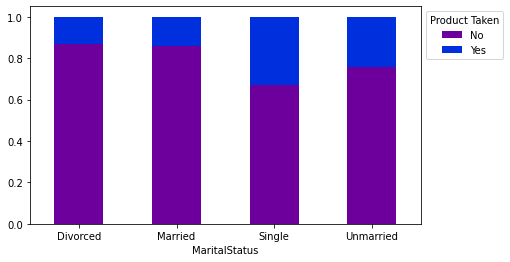

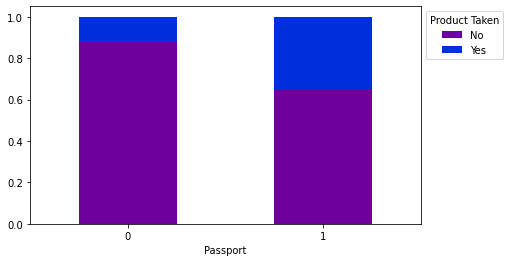

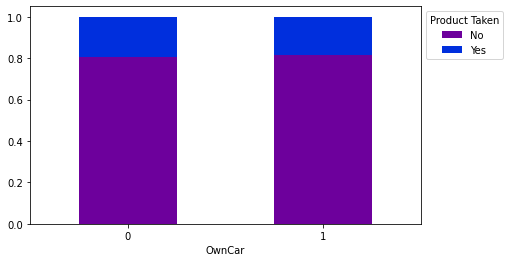

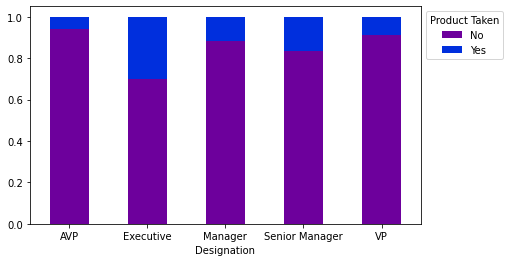

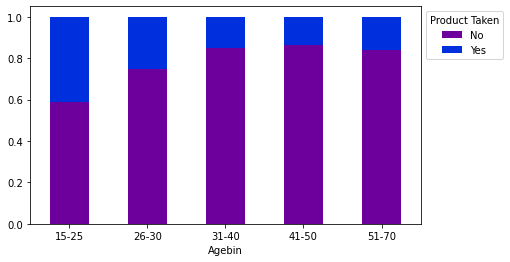

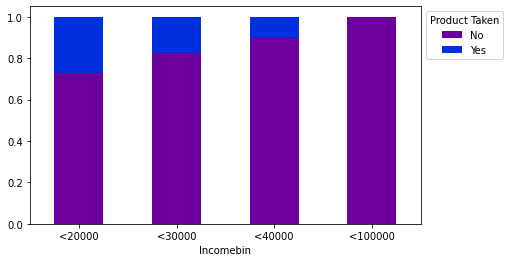

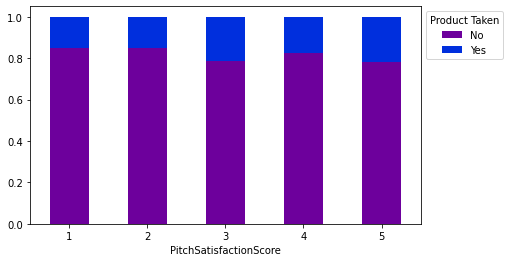

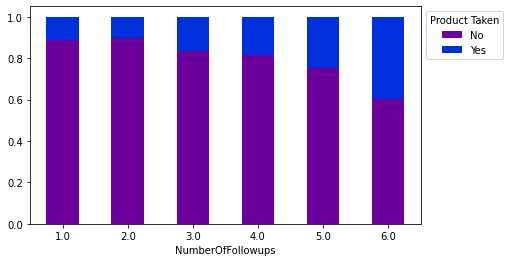

In [ ]:
list_columns=['TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting',
              'ProductPitched','PreferredPropertyStar','NumberOfTrips','MaritalStatus','Passport','OwnCar','Designation','Agebin','Incomebin','PitchSatisfactionScore','NumberOfFollowups']
for i, variable in enumerate(list_columns):
       stacked_plot(df[variable])

In [ ]:
%%shell
jupyter nbconvert --to html /DP_Midterm.ipynb

[NbConvertApp] Converting notebook /DP_Midterm.ipynb to html
[NbConvertApp] Writing 986331 bytes to /DP_Midterm.html
